# 量子ビットを理解する

In [ ]:
!pip install -U pip
!pip install numpy matplotlib ipython 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 初期状態の設定

In [2]:
#量子bit×2の生成

#量子bit1
phi_high  = math.pi*0 # ブロッホ球での|0>からの角度
shift_high= math.pi*0 # 位相差
#量子bit2
phi_low   = math.pi*0 # ブロッホ球での|0>からの角度
shift_low = math.pi*0 # 位相差

## 諸元算出

In [3]:
w_high_0 = math.cos(phi_high/2)
w_high_1 = math.sin(phi_high/2)
w_low_0  = math.cos(phi_low/2)
w_low_1  = math.sin(phi_low/2)

In [4]:
w_00 = w_high_0 * w_low_0
w_01 = w_high_0 * w_low_1
w_10 = w_high_1 * w_low_0
w_11 = w_high_1 * w_low_1
print(w_00**2+w_01**2+w_10**2+w_11**2)

shift_00 = 0
shift_01 = shift_low
shift_10 = shift_high
shift_11 = (shift_high+shift_low-math.pi*2) if (shift_high+shift_low >math.pi*2.0) else (shift_high+shift_low)

1.0


In [5]:
# 波描画用
yo = np.arange(0,2*math.pi,0.01)

In [6]:
# 各量子bit列の波

q_00 = w_00*np.sin(yo-shift_00)
q_01 = w_01*np.sin(yo-shift_01)
q_10 = w_10*np.sin(yo-shift_10)
q_11 = w_11*np.sin(yo-shift_11)

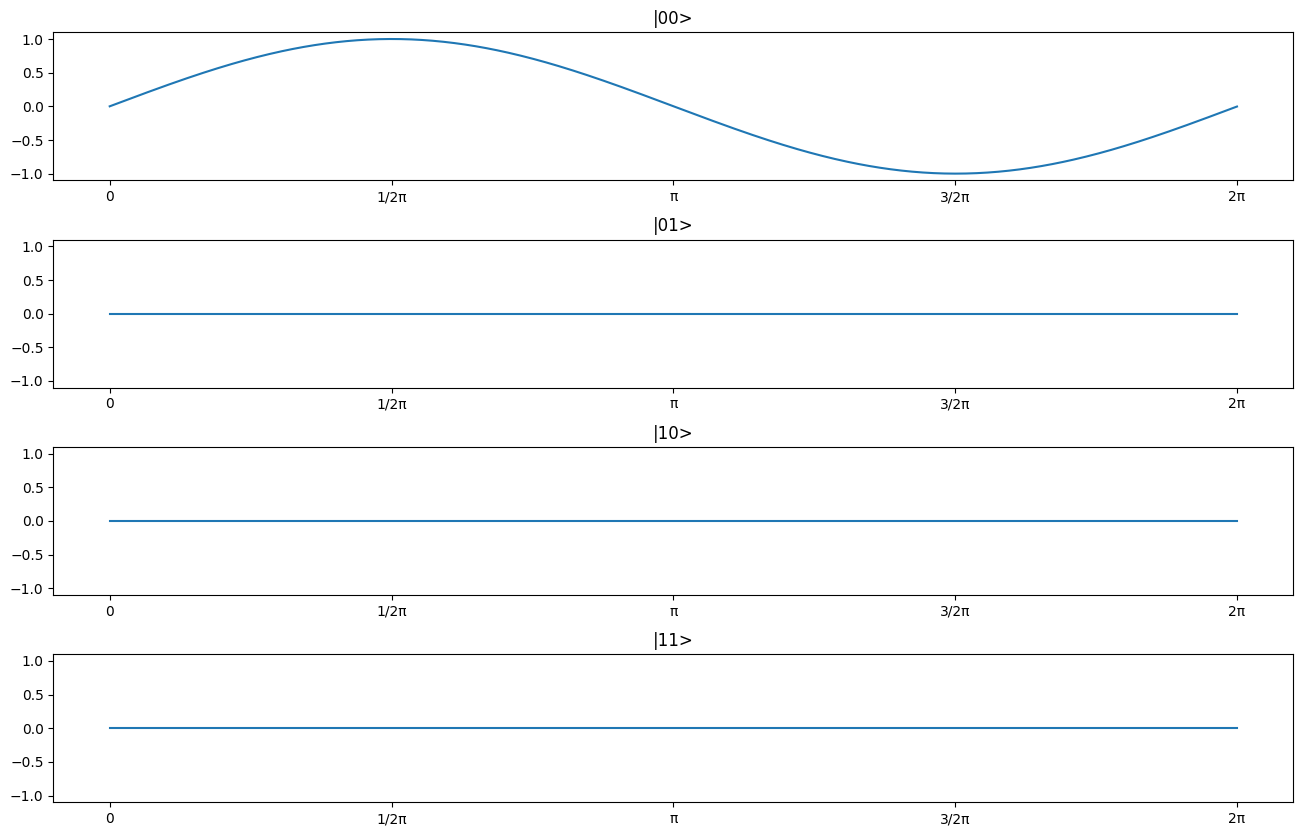

In [7]:
# 描画

fig = plt.figure(figsize=(16,10)) #図のサイズを決定
ax_00 = fig.add_subplot(4,1,1)
ax_01 = fig.add_subplot(4,1,2)
ax_10 = fig.add_subplot(4,1,3)
ax_11 = fig.add_subplot(4,1,4)

ax_00.plot(yo,q_00)
ax_01.plot(yo,q_01)
ax_10.plot(yo,q_10)
ax_11.plot(yo,q_11)

ax_00.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])
ax_01.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])
ax_10.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])
ax_11.set_xticks([0, 1.57,3.14, 4.71,6.28], ["0", "1/2π", "π","3/2π","2π"])

ax_00.set_ylim(-1.1,1.1)
ax_01.set_ylim(-1.1,1.1)
ax_10.set_ylim(-1.1,1.1)
ax_11.set_ylim(-1.1,1.1)

ax_00.set_title("|00>")
ax_01.set_title("|01>")
ax_10.set_title("|10>")
ax_11.set_title("|11>")

plt.subplots_adjust(hspace=0.4)

plt.show()

In [9]:
## グローバル位相のキャンセル
q_00,q_01,q_10,q_11 = cancel_global_shift(q_00,q_01,q_10,q_11)

## アダマールゲート
### 上位ビットに対するゲート操作
$
H
\otimes
I =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1
\otimes
I
&
1
\otimes
I
\\
1
\otimes
I
&
-1
\otimes
I
\end{pmatrix}
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0 & 1 & 0 \\
0 & 1 & 0 & 1 \\
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{pmatrix}
$
<br>
### 下位ビットに対するゲート操作
$
I
\otimes
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1
\otimes
H
&
0
\otimes
H
\\
1
\otimes
H
&
0
\otimes
H
\end{pmatrix}
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 & 0 & 0 \\
1 & -1 & 0 & 0 \\
0 & 0 & 1 & 1 \\
0 & 0 & 1 & -1
\end{pmatrix}
$

In [12]:
#to high bit
q_00,q_10 = h_gate(q_00,q_10)
q_01,q_11 = h_gate(q_01,q_11)

In [13]:
#to low bit
q_00,q_01 = h_gate(q_00,q_01)
q_10,q_11 = h_gate(q_10,q_11)

## 制御ユニタリーゲート

### SWAP
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
$

In [16]:
#SWAP
q_01,q_10 = x_gate(q_01,q_10)

### CX(high bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
$

### CX(low bit control)
$
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{pmatrix}
$

In [26]:
#cx(highをコントロールビット、lowを標的ビットとした場合)
q_10,q_11 = x_gate(q_10,q_11)

In [94]:
#cx(highを標的ビット、lowをコントロールビットとした場合)
q_01,q_11 = x_gate(q_01,q_11)

## ゲート操作

### アダマールゲート
$$
H =
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

In [11]:
#アダマール変換 
# やっていること：|1>を反転させ、反時計周りに1/4π回転させる
def h_gate(x,z):
    x_ = ( x + z)/2**0.5
    z_ = ( x - z)/2**0.5
    return x_,z_

### Tゲート
$$
T =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{4})
\end{pmatrix}
$$

In [83]:
#Tゲート変換 
# やっていること：|1>の位相を1/4π（45°）進める
def t_gate(x,z):
    x_ = x
    z_ = np.roll(z,len(z)//8)
    return x_,z_

### Sゲート
$$
S =
\begin{pmatrix}
1 & 0 \\
0 & exp(\frac{i\pi}{2})
\end{pmatrix}
$$

In [51]:
#Sゲート変換 
# やっていること：|1>の位相を1/2π（90°）進める
def s_gate(x,z)
    x_ = x
    z_ = np.roll(z,len(z)//4)
    return x_,z_

### Xゲート
$$
X =
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

In [15]:
#Xゲート変換 
# やっていること：|0>←→|1>を交換する
def x_gate(x,z):
    x_ = z
    z_ = x
    return x_,z_

### Yゲート
$$
Y =
\begin{pmatrix}
0 & exp(\frac{-i\pi}{2}) \\
exp(\frac{i\pi}{2})  & 0
\end{pmatrix}
$$

In [69]:
#Yゲート変換 
# やっていること：|0>→i|1>、|1>→-i|0>
def y_gate(x,z):
    x_ = np.roll(z,len(z)//4)
    z_ = np.roll(x,-len(x)//4)
    return x_,z_

### Zゲート
$$
Z =
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
$$

In [46]:
#Zゲート変換 
# やっていること：|1>の符号を反転させる
def z_gate(x,z):
    x_ = x
    z_ = -z
    return x_,z_

### グローバル位相のキャンセル

In [8]:
def cancel_global_shift(x00,x01,x10,x11):

    lngt = len(x00)
    if max(x00) >= 0.0001:
        for i in range(lngt*2):
            if x00[i%lngt] <= 0.001:
                if x00[(i+1)%lngt] >= 0.0:
                    break
    elif max(x01) >= 0.0001:
         for i in range(lngt*2):
            if x01[i%lngt] <= 0.001:
                if x01[(i+1)%lngt] >= 0.0:
                    break
    elif max(x10) >= 0.0001:
         for i in range(lngt*2):
            if x10[i%lngt] <= 0.001:
                if x10[(i+1)%lngt] >= 0.0:
                    break
    else:
         for i in range(lngt*2):
            if x11[i%lngt] <= 0.001:
                if x11[(i+1)%lngt] >= 0.0:
                    break
    x00_ = np.roll(x00,-i)
    x01_ = np.roll(x01,-i)
    x10_ = np.roll(x10,-i)
    x11_ = np.roll(x11,-i)
    return x00_,x01_,x10_,x11_